In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
path="E:/Metro1/artifacts//"
df1=pd.read_csv(path+'access_data.csv')
df4=pd.read_csv(path+'egress_data.csv')

# drop duplicate rows with same ID and same values in all columns
df1.drop_duplicates(subset='ID', inplace=True)
df4.drop_duplicates(subset='ID', inplace=True)

print(df1.shape, df4.shape)

(831, 74) (715, 74)


In [129]:
# make a list of slopes
slopes = []
# add all the rows of column ACCESS_SLOPE to the list
slopes.extend(df1['ACCESS_SLOPE'])
slopes.extend(df4['EGRESS_SLOPE'])

# convert all the slopes into float data type
slopes = [float(i) for i in slopes]

# collect the slopes greater than 0 and less than 0 into 2 seperate lists
positive_slopes = [slope for slope in slopes if slope > 0]
negative_slopes = [slope for slope in slopes if slope < 0]

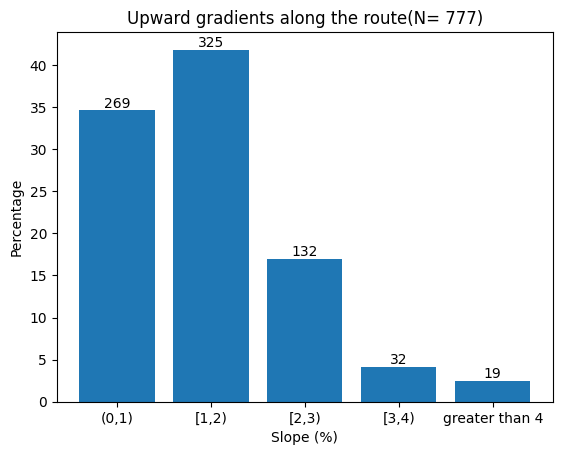

In [130]:
bins = [0, 1, 2, 3, 4, np.inf]

# Bin the values and get the counts
counts, _ = np.histogram(positive_slopes, bins=bins)

# Compute percentages
total = np.sum(counts)
percentages = (counts / total) * 100

# Plot the bar chart
plt.bar(range(len(percentages)), percentages)
plt.xticks(range(len(percentages)), ['(0,1)', '[1,2)', '[2,3)', '[3,4)', 'greater than 4'])
# lets put the count of each catogery on top of the bars
for i, count in enumerate(counts):
    plt.text(i, percentages[i], count, ha='center', va='bottom')

    
plt.ylabel('Percentage')
plt.xlabel('Slope (%)')
plt.title('Upward gradients along the route(N= {})'.format(total))
plt.show()

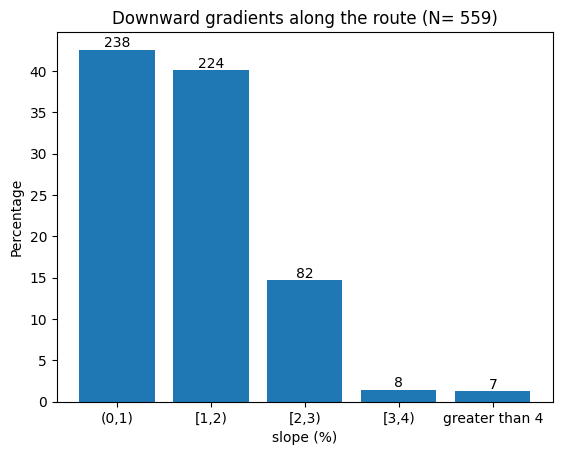

In [131]:
bins = [0, 1, 2, 3, 4, np.inf]

# convert the list of negative slopes into positive values
negative_slope = [-slope for slope in negative_slopes]

# Bin the values and get the counts
counts, _ = np.histogram(negative_slope, bins=bins)

# Compute percentages
total = np.sum(counts)
percentages = (counts / total) * 100

# Plot the bar chart
plt.bar(range(len(percentages)), percentages)
plt.xticks(range(len(percentages)), ['(0,1)', '[1,2)', '[2,3)', '[3,4)', 'greater than 4'])
for i, count in enumerate(counts):
    plt.text(i, percentages[i], count, ha='center', va='bottom')
plt.ylabel('Percentage')
plt.xlabel('slope (%)')
plt.title('Downward gradients along the route (N= {})'.format(total))
plt.show()

#Insights  
- More number of routes are within 2% gradient for both upgrdient and downgradient

In [132]:
# map the values of 2 as 4 and 3 as 1 for RENT_BICYCLE column in df1
df1['RENT_BICYCLE'] = df1['RENT_BICYCLE'].map({2: 4, 3: 1})
df4['RENT_BICYCLE'] = df4['RENT_BICYCLE'].map({1: 4, 3: 2})

In [133]:
df_temp=df1[df1['ACCESS_SLOPE']>0]
average_slope = df_temp.groupby('RENT_BICYCLE')['ACCESS_SLOPE'].mean()
average_distance=df_temp.groupby('RENT_BICYCLE')['A_DISTANCE_MAP'].mean()
# print only average slope corresponding to RENT_BICYCLE equals 1 
print("Avg slope for access trip when the route is upgradient for commuters willing to use bicycle is {}. Avg distance is {} km".
      format(round(average_slope[1],4),round(average_distance[1],2)))
print("Avg slope for access trip when the route is upgradient for commuters not willing to use bicycle is {}. Avg distance is {} km\n".
        format(round(average_slope[4],4),round(average_distance[4],2)))



df_temp=df1[df1['ACCESS_SLOPE']<0]
average_slope = df_temp.groupby('RENT_BICYCLE')['ACCESS_SLOPE'].mean()
average_distance=df_temp.groupby('RENT_BICYCLE')['A_DISTANCE_MAP'].mean()

print("Average slope for access trip when the route is downgradient for commuters willing to use bicycle is {}. Avg distance is {} km".
        format(round(average_slope[1],4),round(average_distance[1],2)))
print("Average slope for access trip when the route is downgradient for commuters not willing to use bicycle is {}. Avg distance is {} km\n".
        format(round(average_slope[4],4),round(average_distance[4],2)))


Avg slope for access trip when the route is upgradient for commuters willing to use bicycle is 1.2111. Avg distance is 2.12 km
Avg slope for access trip when the route is upgradient for commuters not willing to use bicycle is 1.5198. Avg distance is 2.79 km

Average slope for access trip when the route is downgradient for commuters willing to use bicycle is -1.4404. Avg distance is 1.93 km
Average slope for access trip when the route is downgradient for commuters not willing to use bicycle is -1.3058. Avg distance is 1.21 km



## Insights
- Greater downgradient encourages people to bicycle to much longer distances.
- Commuters are more likely to use bicycle for access trip when the upgradient is smaller.
#
 The above conclusions are consistent with normal cycling behaviour.

In [134]:
df_temp=df4[df4['EGRESS_SLOPE']>0]
average_slope = df_temp.groupby('RENT_BICYCLE')['EGRESS_SLOPE'].mean()
average_distance=df_temp.groupby('RENT_BICYCLE')['E_DISTANCE_MAP'].mean()
# print only average slope corresponding to RENT_BICYCLE equals 1 
print("Avg slope for egress trip when the route is upgradient for commuters willing to use bicycle is {}. Avg distance is {}".
      format(round(average_slope[2],4),round(average_distance[2],2)))
print("Avg slope for egress trip when the route is upgradient for commuters not willing to use bicycle is {}. Avg distance is {} km\n".
        format(round(average_slope[4],4),round(average_distance[4],2)))



df_temp=df4[df4['EGRESS_SLOPE']<0]
average_slope = df_temp.groupby('RENT_BICYCLE')['EGRESS_SLOPE'].mean()
average_distance=df_temp.groupby('RENT_BICYCLE')['E_DISTANCE_MAP'].mean()

print("Average slope for egress trip when the route is downgradient for commuters willing to use bicycle is {}. Avg distance is {}".
        format(round(average_slope[2],4),round(average_distance[2],2)))
print("Average slope for egress trip when the route is downgradient for commuters not willing to use bicycle is {}. Avg distance is {} km\n".
        format(round(average_slope[4],4),round(average_distance[4],2)))


Avg slope for egress trip when the route is upgradient for commuters willing to use bicycle is 1.3665. Avg distance is 1.6
Avg slope for egress trip when the route is upgradient for commuters not willing to use bicycle is 1.3142. Avg distance is 2.0 km

Average slope for egress trip when the route is downgradient for commuters willing to use bicycle is -1.1237. Avg distance is 1.68
Average slope for egress trip when the route is downgradient for commuters not willing to use bicycle is -1.184. Avg distance is 3.39 km



## Insights
- Gradient has less influence on choice of using bicycle for egress trip.



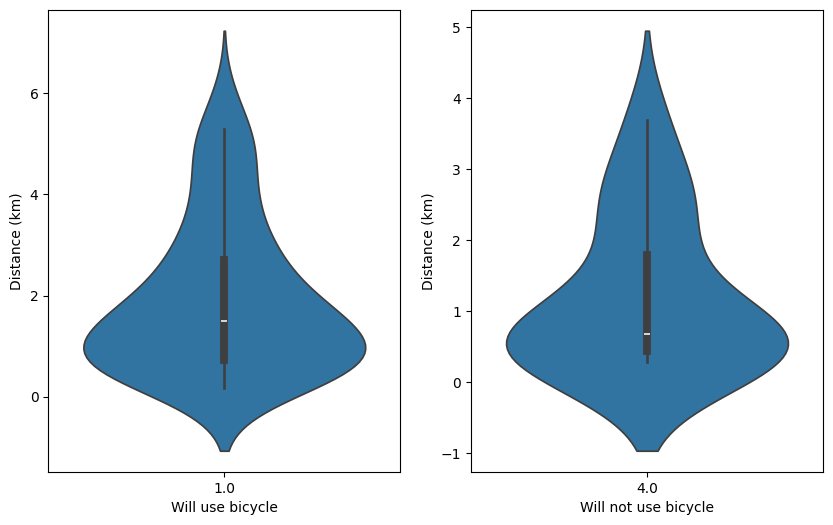

In [135]:
# lets get the box plot of ACCESS_SLOPE for RENT_BICYCLE AS 1
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df_temp=df1[df1['RENT_BICYCLE']==1]
df_temp=df_temp[df_temp['ACCESS_SLOPE']<0]
sns.violinplot(x='RENT_BICYCLE', y='A_DISTANCE_MAP', data=df_temp)
plt.ylabel('Distance (km)')
plt.xlabel('Will use bicycle')
plt.subplot(1,2,2)
df_temp=df1[df1['RENT_BICYCLE']==4]
df_temp=df_temp[df_temp['ACCESS_SLOPE']<0]
sns.violinplot(x='RENT_BICYCLE', y='A_DISTANCE_MAP', data=df_temp)
plt.ylabel('Distance (km)')
plt.xlabel('Will not use bicycle')
plt.show()


Insights
- Mean of distance range for people not willing to use bicycle is close to 0.5
- Mean of distance range for people willing to use bicycle is close to 1.5

In [18]:
# lets bin and get the count of ACCESS_SLOPE values which are less than -2, between -2 and 2, greater than 2
# making 3 bins
bins = [-np.inf, -1, 1, np.inf]
labels = ['downhill', 'flat', 'uphill']
df=df1.copy()
df['ACCESS_SLOPE'] = pd.cut(df['ACCESS_SLOPE'], bins=bins, labels=labels)
df['ACCESS_SLOPE'].value_counts()

flat        292
uphill      223
downhill    147
Name: ACCESS_SLOPE, dtype: int64

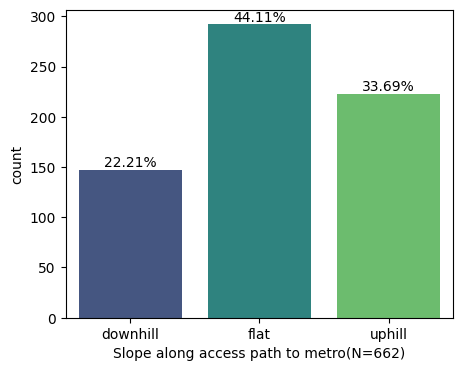

In [19]:
# lets plot histogram of ACCESS_SLOPE with percentage along y axis and count as label on bars
plt.figure(figsize=(5, 4))
total = len(df)
ax = sns.countplot(x='ACCESS_SLOPE', data=df, palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height / total:.2%}', ha='center')
plt.xlabel('Slope along access path to metro(N={})'.format(total))
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_209592\2571381619.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])  # Format y-axis as percentage


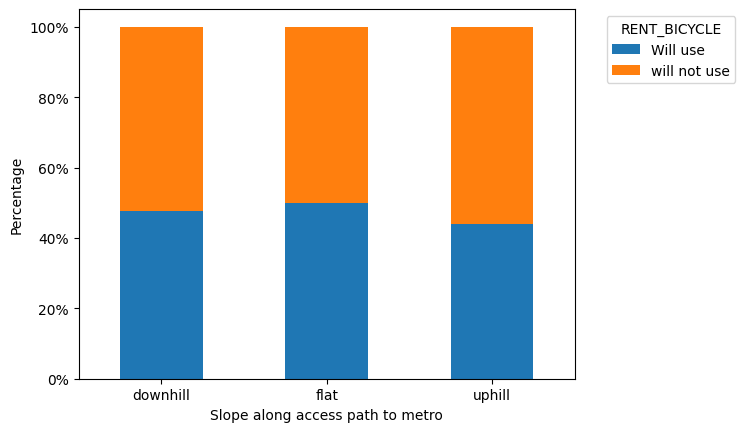

flat        292
uphill      223
downhill    147
Name: ACCESS_SLOPE, dtype: int64

In [20]:
# lets get a crosstabulation between ACCESS_DIS_B and ACCESS_SLOPE

pd.crosstab(df['RENT_BICYCLE'], df['ACCESS_SLOPE'])

# replace 3 in RENT_BICYCLE to 1 and 2 to 4
df['RENT_BICYCLE'].replace({3: 1, 2: 4}, inplace=True) 

# lets plot the crosstabulation as stacked bar chart with percentage values on y axis
pd.crosstab( df['ACCESS_SLOPE'],df['RENT_BICYCLE'], normalize='index').plot(kind='bar', stacked=True)
plt.legend(title='RENT_BICYCLE', bbox_to_anchor=(1.05, 1), loc='upper left',labels=['Will use','will not use'])
plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])  # Format y-axis as percentage
plt.xlabel('Slope along access path to metro')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

df['ACCESS_SLOPE'].value_counts()

In [21]:
# lets bin and get the count of ACCESS_SLOPE values which are less than -2, between -2 and 2, greater than 2
# making 3 bins
bins = [-np.inf, -1, 1, np.inf]
labels = ['downhill', 'flat', 'uphill']
df=df3.copy()
df['EGRESS_SLOPE'] = pd.cut(df['EGRESS_SLOPE'], bins=bins, labels=labels)
df['EGRESS_SLOPE'].value_counts()

flat        285
uphill      155
downhill    114
Name: EGRESS_SLOPE, dtype: int64

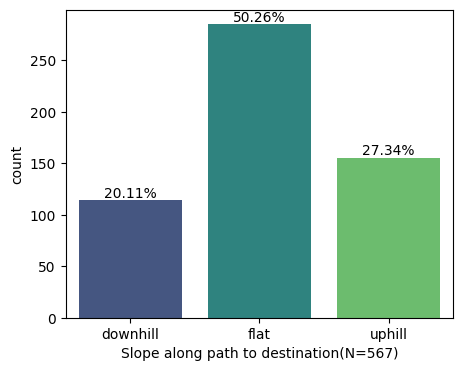

In [22]:
# lets plot histogram of ACCESS_SLOPE with percentage along y axis and count as label on bars
plt.figure(figsize=(5, 4))
total = len(df)
ax = sns.countplot(x='EGRESS_SLOPE', data=df, palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height / total:.2%}', ha='center')
plt.xlabel('Slope along path to destination(N={})'.format(total))
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_209592\4102941253.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])  # Format y-axis as percentage


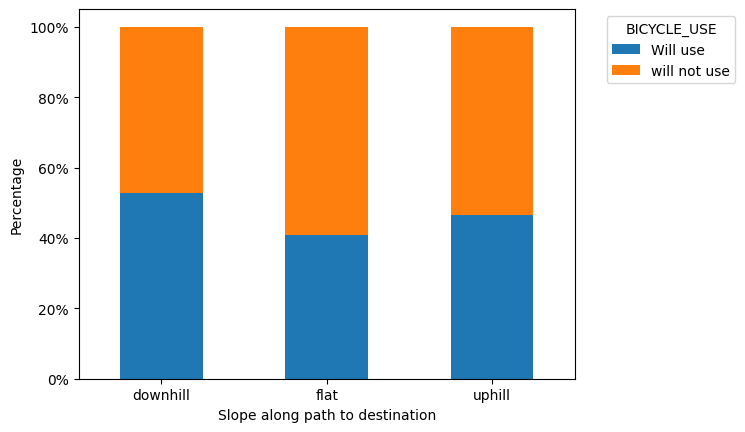

flat        285
uphill      155
downhill    114
Name: EGRESS_SLOPE, dtype: int64

In [23]:
# lets get the cross tabulation between EGRESS_DIS_B and EGRESS_SLOPE
pd.crosstab(df['EGRESS_DIS_B'], df['EGRESS_SLOPE'])
df['RENT_BICYCLE'].replace({3: 2, 1: 4}, inplace=True) 

# lets plot the crosstabulation as stacked bar chart with percentage values on y axis
pd.crosstab( df['EGRESS_SLOPE'],df['RENT_BICYCLE'], normalize='index').plot(kind='bar', stacked=True)
plt.legend(title='BICYCLE_USE', bbox_to_anchor=(1.05, 1), loc='upper left',labels=['Will use','will not use'])
plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])  # Format y-axis as percentage
plt.xlabel('Slope along path to destination')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

df['EGRESS_SLOPE'].value_counts()

In [24]:
df=df1.copy()

# drop the rows with no values in column A_INTERSECTIONS
df.dropna(subset=['A_INTERSECTIONS'], inplace=True)
# df['A_INTERSECTIONS'].describe()

df['DISTURB_DENSITY']=df['A_INTERSECTIONS']/df['A_DISTANCE_MAP']

# drop the rows with disturb density greater than 100
df=df[df['DISTURB_DENSITY']<=100]
# lets plot box plot of DISTURB_DENSITY
# sns.boxplot(df['DISTURB_DENSITY'])

df['DISTURB_DENSITY'].describe()


count    569.000000
mean      14.628425
std        9.600906
min        0.000000
25%        8.333333
50%       13.555556
75%       19.285714
max       92.083333
Name: DISTURB_DENSITY, dtype: float64

C:\Users\PC\AppData\Local\Temp\ipykernel_227020\407572110.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])  # Format y-axis as percentage


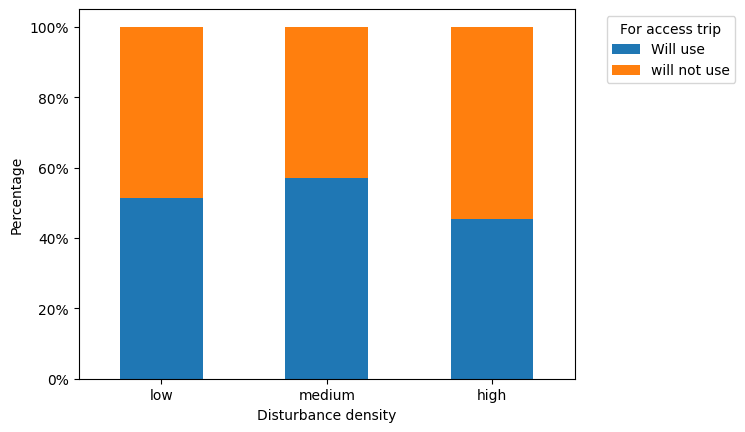

In [298]:
# lets make 4 bin of disturb density 
bins = [0, 10, 15, float('inf')]
labels = ['low', 'medium', 'high']

df['RENT_BICYCLE'].replace({3: 1, 2: 4}, inplace=True) 

df['DISTURB_DENSITY'] = pd.cut(df['DISTURB_DENSITY'], bins=bins, labels=labels)



# lets plot the crosstabulation between DISTURB_DENSITY and RENT_BICYCLE
pd.crosstab(df['DISTURB_DENSITY'], df['RENT_BICYCLE'], normalize='index').plot(kind='bar', stacked=True)
plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])  # Format y-axis as percentage
plt.legend(title='For access trip', bbox_to_anchor=(1.05, 1), loc='upper left',labels=['Will use','will not use'])
plt.xlabel('Disturbance density')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

In [299]:
df=df3.copy()

# drop the rows with no values in column A_INTERSECTIONS
df.dropna(subset=['A_INTERSECTIONS'], inplace=True)
# df['A_INTERSECTIONS'].describe()

df['DISTURB_DENSITY']=df['A_INTERSECTIONS']/df['E_DISTANCE_MAP']

# # drop the rows with disturb density greater than 100
df=df[df['DISTURB_DENSITY']<=100]
# lets plot box plot of DISTURB_DENSITY
# sns.boxplot(df['DISTURB_DENSITY'])

# df['DISTURB_DENSITY'].describe()


C:\Users\PC\AppData\Local\Temp\ipykernel_227020\2280684998.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])  # Format y-axis as percentage


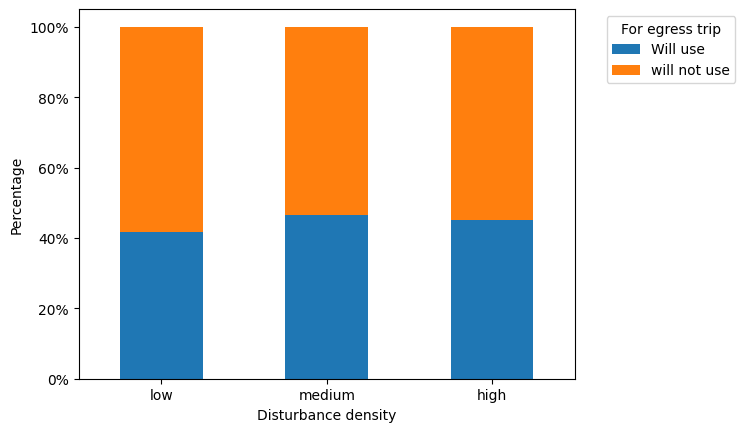

In [300]:
# lets make 4 bin of disturb density 
bins = [0, 10, 15, float('inf')]
labels = ['low', 'medium', 'high']
df['DISTURB_DENSITY'] = pd.cut(df['DISTURB_DENSITY'], bins=bins, labels=labels)
df['RENT_BICYCLE'].replace({3: 2, 1: 4}, inplace=True) 

# lets plot the crosstabulation between DISTURB_DENSITY and RENT_BICYCLE
pd.crosstab(df['DISTURB_DENSITY'], df['RENT_BICYCLE'], normalize='index').plot(kind='bar', stacked=True)
plt.legend(title='For egress trip', bbox_to_anchor=(1.05, 1), loc='upper left',labels=['Will use','will not use'])
plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])  # Format y-axis as percentage
plt.xlabel('Disturbance density')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

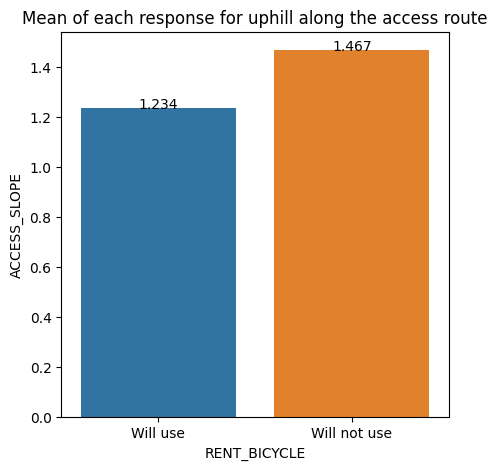

In [301]:
df1['ACCESS_SLOPE'] = pd.to_numeric(df1['ACCESS_SLOPE'], errors='coerce')
df=df1.copy()

# consider only positive values of ACCESS_SLOPE
df = df[df['ACCESS_SLOPE'] > 0]

# convert the values of 3 as 1 and 2 as 4 in RENT_BICYCLE
df['RENT_BICYCLE'] = df['RENT_BICYCLE'].replace({3: 1, 2: 4})

# get the mean of ACCESS_SLOPE for each unique value of RENT_BICYCLE column
df = df.groupby('RENT_BICYCLE')['ACCESS_SLOPE'].mean().reset_index()

# plot the data
plt.figure(figsize=(5, 5))
sns.barplot(x='RENT_BICYCLE', y='ACCESS_SLOPE', data=df)
plt.title('Mean of each response for uphill along the access route')
plt.xticks(ticks=[0, 1], labels=['Will use', 'Will not use'])
# show the mean values on the plot
for i in range(df.shape[0]):
    plt.text(i, df['ACCESS_SLOPE'].iloc[i] , round(df['ACCESS_SLOPE'].iloc[i], 3), ha='center')
# plt.legend(title='RENT_BICYCLE',labels=['Will use','will not use'])
plt.show()


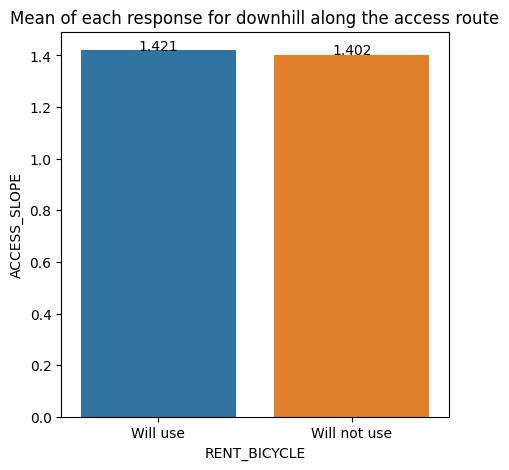

In [302]:
df1['ACCESS_SLOPE'] = pd.to_numeric(df1['ACCESS_SLOPE'], errors='coerce')
df=df1.copy()

# consider only positive values of ACCESS_SLOPE
df = df[df['ACCESS_SLOPE'] < 0]

# convert the negative values into positive values
df['ACCESS_SLOPE'] = df['ACCESS_SLOPE'].abs()

# convert the values of 3 as 1 and 2 as 4 in RENT_BICYCLE
df['RENT_BICYCLE'] = df['RENT_BICYCLE'].replace({3: 1, 2: 4})

# get the mean of ACCESS_SLOPE for each unique value of RENT_BICYCLE column
df = df.groupby('RENT_BICYCLE')['ACCESS_SLOPE'].mean().reset_index()

# plot the data
plt.figure(figsize=(5, 5))
sns.barplot(x='RENT_BICYCLE', y='ACCESS_SLOPE', data=df)
plt.title('Mean of each response for downhill along the access route')
plt.xticks(ticks=[0, 1], labels=['Will use', 'Will not use'])
# show the mean values on the plot
for i in range(df.shape[0]):
    plt.text(i, df['ACCESS_SLOPE'].iloc[i] , round(df['ACCESS_SLOPE'].iloc[i], 3), ha='center')
# plt.legend(title='RENT_BICYCLE',labels=['Will use','will not use'])
plt.show()


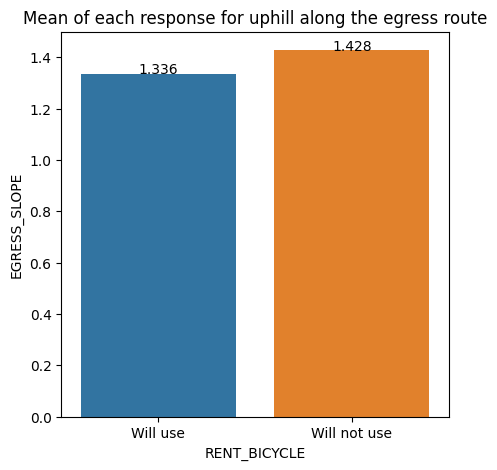

In [303]:
# drop na values in column EGRESS_SLOPE of df3
df3.dropna(subset=['EGRESS_SLOPE'], inplace=True)

df=df3.copy()
# consider only positive values in EGRESS_SLOPE column
df = df[df['EGRESS_SLOPE'] > 0]

# convert the values of 3 as 2 and 1 as 4 in EGRESS_SLOPE column
df['RENT_BICYCLE'] = df['RENT_BICYCLE'].replace({3: 2, 1: 4})

# get the mean of EGRESS_SLOPE for each unique value of RENT_BICYCLE column
df = df.groupby('RENT_BICYCLE')['EGRESS_SLOPE'].mean().reset_index()

# plot the data
plt.figure(figsize=(5, 5))
sns.barplot(x='RENT_BICYCLE', y='EGRESS_SLOPE', data=df)
plt.title('Mean of each response for uphill along the egress route')
# plt.legend(title='RENT_BICYCLE',labels=['Will use','will not use'])
plt.xticks(ticks=[0, 1], labels=['Will use', 'Will not use'])
# show the mean values on the plot
for i in range(df.shape[0]):
    plt.text(i, df['EGRESS_SLOPE'].iloc[i] , round(df['EGRESS_SLOPE'].iloc[i], 3), ha='center')
plt.show()

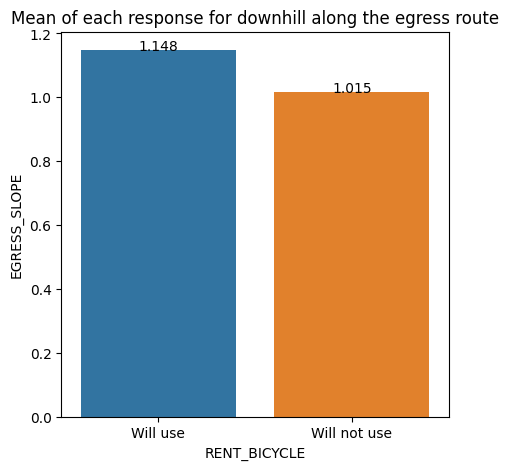

In [304]:
# drop na values in column EGRESS_SLOPE of df3
df3.dropna(subset=['EGRESS_SLOPE'], inplace=True)

df=df3.copy()
# consider only positive values in EGRESS_SLOPE column
df = df[df['EGRESS_SLOPE'] < 0]

# convert the negative values to positive in EGRESS_SLOPE column
df['EGRESS_SLOPE'] = df['EGRESS_SLOPE'].abs()

# convert the values of 3 as 2 and 1 as 4 in EGRESS_SLOPE column
df['RENT_BICYCLE'] = df['RENT_BICYCLE'].replace({3: 2, 1: 4})

# get the mean of EGRESS_SLOPE for each unique value of RENT_BICYCLE column
df = df.groupby('RENT_BICYCLE')['EGRESS_SLOPE'].mean().reset_index()

# plot the data
plt.figure(figsize=(5, 5))
sns.barplot(x='RENT_BICYCLE', y='EGRESS_SLOPE', data=df)
plt.title('Mean of each response for downhill along the egress route')
# plt.legend(title='RENT_BICYCLE',labels=['Will use','will not use'])
plt.xticks(ticks=[0, 1], labels=['Will use', 'Will not use'])
# show the mean values on the plot
for i in range(df.shape[0]):
    plt.text(i, df['EGRESS_SLOPE'].iloc[i] , round(df['EGRESS_SLOPE'].iloc[i], 3), ha='center')
plt.show()

# Impact of intersection density on willingness to use bicycle

In [136]:
df_intersection1=df1.copy()
df_intersection4=df4.copy()

Text(0, 0.5, 'Intersections')

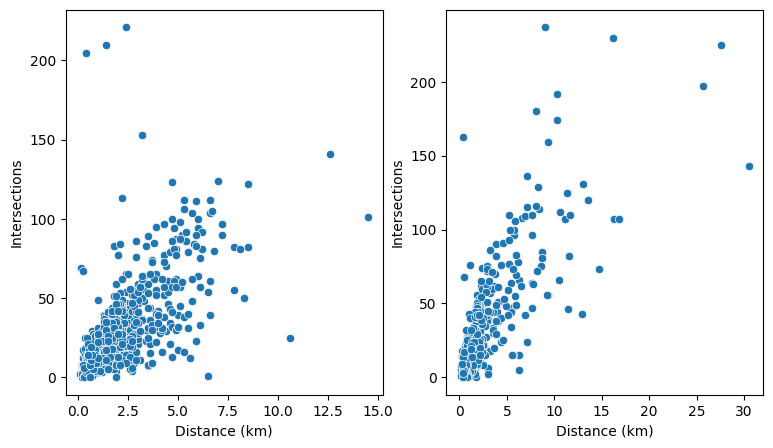

In [137]:

plt.figure(figsize=(9, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_intersection1,x='A_DISTANCE_MAP', y='A_INTERSECTIONS')
plt.xlabel('Distance (km)')
plt.ylabel('Intersections')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_intersection4,x='E_DISTANCE_MAP', y='A_INTERSECTIONS')
plt.xlabel('Distance (km)')
plt.ylabel('Intersections')

## Some data cleaning

In [96]:
# if the distance is less than 5 km and intersection is more than 100 remove such entries
df_intersection1 = df_intersection1[~((df_intersection1['A_DISTANCE_MAP'] < 5) & (df_intersection1['A_INTERSECTIONS'] > 100))]
df_intersection4 = df_intersection4[~((df_intersection4['E_DISTANCE_MAP'] < 5) & (df_intersection4['A_INTERSECTIONS'] > 100))]

Text(0, 0.5, 'Intersections')

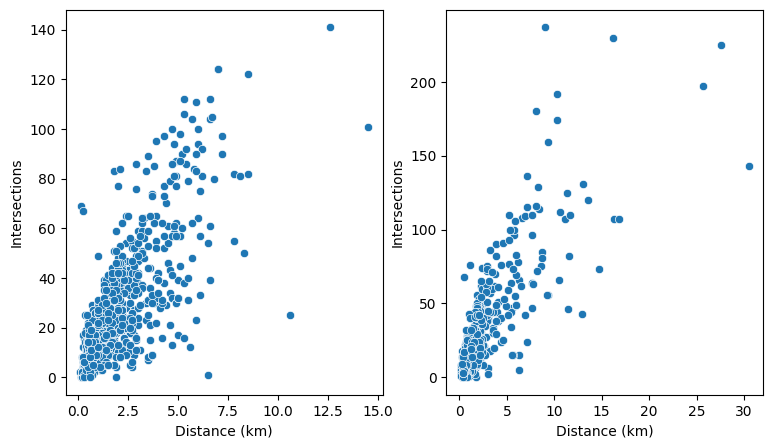

In [97]:
# lets plot a scatter plot of A_DISTANCE_MAP and I_DENSITY
plt.figure(figsize=(9, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_intersection1,x='A_DISTANCE_MAP', y='A_INTERSECTIONS')
plt.xlabel('Distance (km)')
plt.ylabel('Intersections')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_intersection4,x='E_DISTANCE_MAP', y='A_INTERSECTIONS')
plt.xlabel('Distance (km)')
plt.ylabel('Intersections')

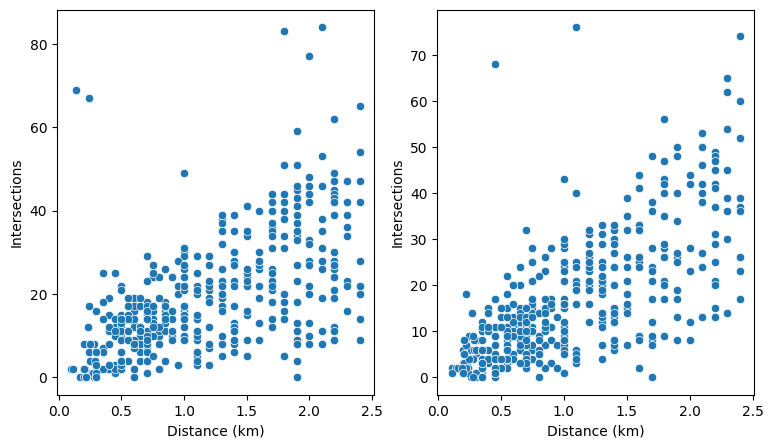

In [98]:
# plot the scatter plot of A_INTERSECTIONS when A_DISTANCE_MAP is less then 2.5 km
plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_intersection1[df_intersection1['A_DISTANCE_MAP'] < 2.5], x='A_DISTANCE_MAP', y='A_INTERSECTIONS')
plt.xlabel('Distance (km)')
plt.ylabel('Intersections')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_intersection4[df_intersection4['E_DISTANCE_MAP'] < 2.5], x='E_DISTANCE_MAP', y='A_INTERSECTIONS')
plt.xlabel('Distance (km)')
plt.ylabel('Intersections')

plt.show()

#### Removing points where if distance is less than 1.5 km but intersections is greater than 40

In [99]:
df_intersection1 = df_intersection1[~((df_intersection1['A_DISTANCE_MAP'] < 1.5) & (df_intersection1['A_INTERSECTIONS'] > 40))]
df_intersection4 = df_intersection4[~((df_intersection4['E_DISTANCE_MAP'] < 1.5) & (df_intersection4['A_INTERSECTIONS'] > 40))]

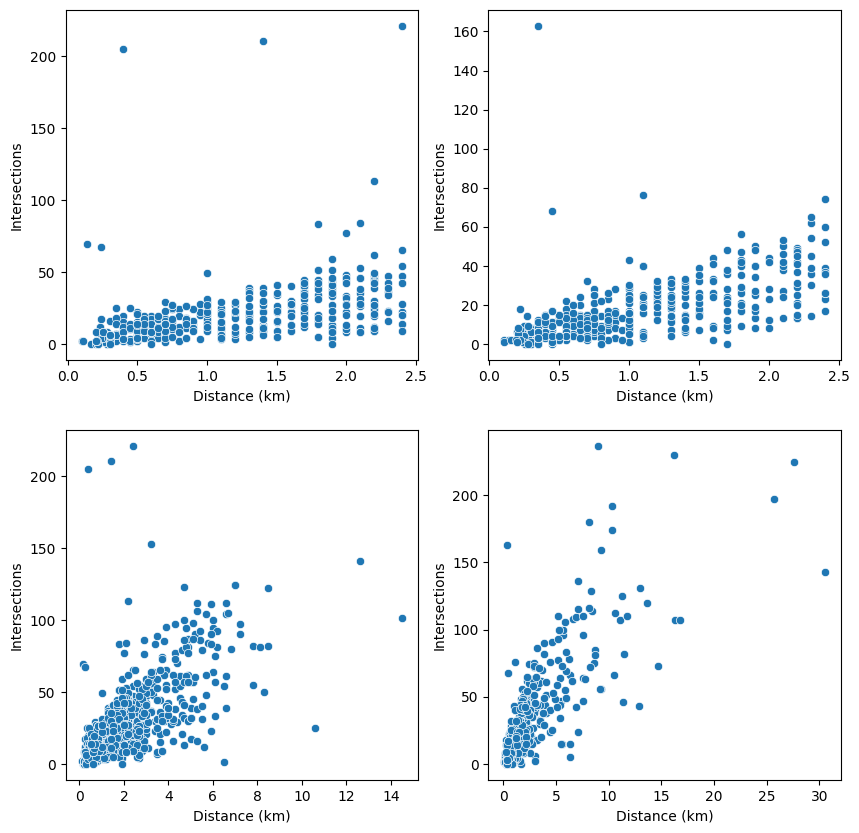

In [143]:
# plot the scatter plot of A_INTERSECTIONS when A_DISTANCE_MAP is less then 2.5 km
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(data=df_intersection1[df_intersection1['A_DISTANCE_MAP'] < 2.5], x='A_DISTANCE_MAP', y='A_INTERSECTIONS')
plt.xlabel('Distance (km)')
plt.ylabel('Intersections')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df_intersection4[df_intersection4['E_DISTANCE_MAP'] < 2.5], x='E_DISTANCE_MAP', y='A_INTERSECTIONS')
plt.xlabel('Distance (km)')
plt.ylabel('Intersections')


plt.subplot(2, 2, 3)
sns.scatterplot(data=df_intersection1,x='A_DISTANCE_MAP', y='A_INTERSECTIONS')
plt.xlabel('Distance (km)')
plt.ylabel('Intersections')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df_intersection4,x='E_DISTANCE_MAP', y='A_INTERSECTIONS')
plt.xlabel('Distance (km)')
plt.ylabel('Intersections')

plt.show()

In [139]:
# drop rows with no entries in column A_INTERSECTIONS but keep all other columns
df_intersection1.dropna(subset=['A_INTERSECTIONS'], inplace=True)
df_intersection4.dropna(subset=['A_INTERSECTIONS'], inplace=True)

# creating a new column named I_DENSITY computing intersection density
df_intersection1['I_DENSITY'] = df_intersection1['A_INTERSECTIONS'] / df_intersection1['A_DISTANCE_MAP']
df_intersection4['I_DENSITY'] = df_intersection4['A_INTERSECTIONS'] / df_intersection4['E_DISTANCE_MAP']

In [140]:
# lets print the mean value of I_DENSITY for each value of column RENT_BICYCLE for both data frames

mean_density1 = df_intersection1.groupby('RENT_BICYCLE')['I_DENSITY'].mean()
mean_density4 = df_intersection4.groupby('RENT_BICYCLE')['I_DENSITY'].mean()

average_distance1=df_intersection1.groupby('RENT_BICYCLE')['A_DISTANCE_MAP'].mean()

print("Avg intersection density for access trip of commuters willing to use bicycle is {}. Avg distance is {}".
      format(round(mean_density1[1],4),round(average_distance1[1],2)))
print("Avg intersection density for access trip of commuters not willing to use bicycle is {}. Avg distance is {} km\n".
        format(round(mean_density1[4],4),round(average_distance1[4],2)))

average_distance4=df_intersection4.groupby('RENT_BICYCLE')['E_DISTANCE_MAP'].mean()

print("Avg intersection density for egress trip of commuters willing to use bicycle is {}. Avg distance is {}".
        format(round(mean_density4[2],4),round(average_distance4[2],2)))
print("Avg intersection density for egress trip of commuters not willing to use bicycle is {}. Avg distance is {} km\n".
        format(round(mean_density4[4],4),round(average_distance4[4],2)))



Avg intersection density for access trip of commuters willing to use bicycle is 16.2113. Avg distance is 2.08
Avg intersection density for access trip of commuters not willing to use bicycle is 14.2473. Avg distance is 2.24 km

Avg intersection density for egress trip of commuters willing to use bicycle is 18.3595. Avg distance is 1.79
Avg intersection density for egress trip of commuters not willing to use bicycle is 12.7964. Avg distance is 2.71 km



## Insights
- The number of data points available are less for the case of not willing to use bicycle (20%), hence analysis may be not accurate.
- Use of cycle for access trip has little to no influence of intersection density.
- For same interection desity commuters are more likely to use bicycle when egress distance is less.

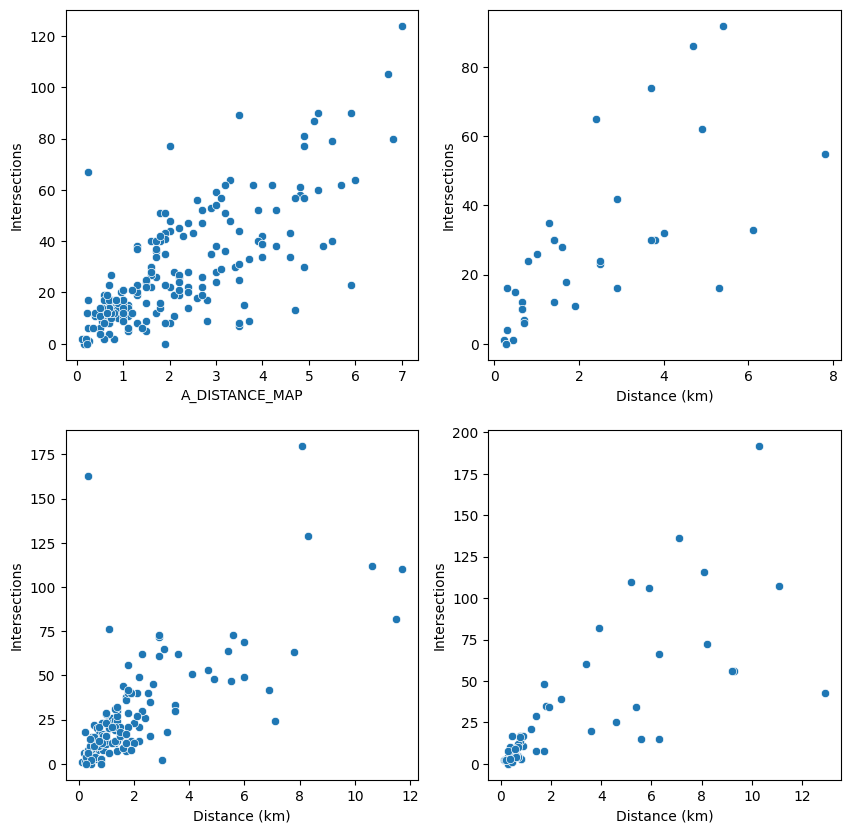

In [126]:

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(data=df_intersection1[df_intersection1['RENT_BICYCLE']==1], x='A_DISTANCE_MAP', y='A_INTERSECTIONS')
plt.ylabel('Intersections')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df_intersection1[df_intersection1['RENT_BICYCLE'] == 4], x='A_DISTANCE_MAP', y='A_INTERSECTIONS')
plt.xlabel('Distance (km)')
plt.ylabel('Intersections')


plt.subplot(2, 2, 3)
sns.scatterplot(data=df_intersection4[df_intersection4['RENT_BICYCLE'] == 2], x='E_DISTANCE_MAP', y='A_INTERSECTIONS')
plt.xlabel('Distance (km)')
plt.ylabel('Intersections')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df_intersection4[df_intersection4['RENT_BICYCLE'] == 4], x='E_DISTANCE_MAP', y='A_INTERSECTIONS')
plt.xlabel('Distance (km)')
plt.ylabel('Intersections')

plt.show()

In [142]:
df_intersection4.shape

(626, 75)